In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.7 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 20.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-py3-none-any.whl size=138405 sha256=35f48f1fb94dfafdba370125f7a2076d86f363b42eba49de4a1d2aa9e66772de
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/52/58/ee/e76652228a2ca264efbeb1e2b1f82feb5175098caf738f861b
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29

In [2]:
import yfinance as yf

In [3]:
tesla = yf.Ticker("TSLA")

In [5]:
tesla_data = tesla.history(period="3mo")

In [6]:
print(tesla_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-01-29 00:00:00-05:00  185.630005  191.479996  183.669998  190.929993   
2024-01-30 00:00:00-05:00  195.330002  196.360001  190.610001  191.589996   
2024-01-31 00:00:00-05:00  187.000000  193.970001  185.850006  187.289993   
2024-02-01 00:00:00-05:00  188.500000  189.880005  184.279999  188.860001   
2024-02-02 00:00:00-05:00  185.039993  188.690002  182.000000  187.910004   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-01-29 00:00:00-05:00  125013100        0.0           0.0  
2024-01-30 00:00:00-05:00  109982300        0.0           0.0  
2024-01-31 00:00:00-05:00  103221400        0.0           0.0  
2024-02-01 00:00:00-05:00   91843300        0.0           0.0  
2024-02-02 00:00:00-05:00  110505100        0.0           0.0  


In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [17]:
# Send a GET request to the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)

In [18]:
# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

In [19]:
# Find the revenue data table
revenue_table = soup.find("table", class_="historical_data_table")

In [25]:
# Extract the headers
headers = [header.text for header in revenue_table.find_all("th")]

AttributeError: 'NoneType' object has no attribute 'find_all'

In [26]:
# Extract the rows
rows = []
for row in revenue_table.find_all("tr")[1:]:
    row_data = [data.text for data in row.find_all("td")]
    rows.append(row_data)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [27]:
# Create a DataFrame
tesla_revenue = pd.DataFrame(rows, columns=headers)

NameError: name 'headers' is not defined

In [28]:
# Display the DataFrame
print(tesla_revenue)

NameError: name 'tesla_revenue' is not defined

In [15]:
soup = bs(r.content, 'html5lib')

NameError: name 'bs4' is not defined

In [22]:
tesla_revenue = pd.DataFrame(
                [{"Date": r.select_one('td:nth-of-type(1)').text, 
                 "Revenue":r.select_one('td:nth-of-type(2)').text} 
                 for r in soup.select('#style-1 div + div .historical_data_table tr')[1:]]
                , columns = ['Date', 'Revenue'])

In [23]:
print(tesla_revenue)

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [25]:
print(tesla_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [28]:
tesla_revenue.tail()

,Date,Revenue


In [30]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [31]:
# Send a GET request to the webpage
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
response = requests.get(url)

In [32]:
# Parse the HTML content
soup = bs(response.content, 'html.parser')

In [33]:
# Extract revenue data from the table
revenue_data = []
for row in soup.select('.historical_data_table tbody tr'):
    date = row.select_one('td:nth-of-type(1)').text
    revenue = row.select_one('td:nth-of-type(2)').text
    revenue_data.append({"Date": date, "Revenue": revenue})

In [34]:
revenue_data

[]

In [35]:
# Create a DataFrame
tesla_revenue = pd.DataFrame(revenue_data)

In [36]:
print(tesla_revenue)

Empty DataFrame
Columns: []
Index: []


In [31]:
import requests 
from bs4 import BeautifulSoup

In [32]:
import pandas as pd

In [33]:
# Send a GET request to the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)

In [34]:
# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

In [36]:
# Extract revenue data from the table
revenue_data = []
for row in soup.select('.historical_data_table tbody tr'):
    date = row.select_one('td:nth-of-type(1)').text
    revenue = row.select_one('td:nth-of-type(2)').text
    revenue_data.append({"Date": date, "Revenue": revenue})

In [39]:
# Create a DataFrame
tesla_revenue = pd.DataFrame(revenue_data)

In [41]:
# Display the DataFrame
print(tesla_revenue)

Empty DataFrame
Columns: []
Index: []


In [42]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "GME"

# Get the data
gme_data = yf.download(ticker_symbol, start="2020-01-01", end="2021-01-01")

# Display the data
print(gme_data.head())

[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600


In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [45]:
# Send a GET request to the webpage
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)

In [46]:
# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

In [47]:
# Find the revenue data table
revenue_table = soup.find("table", class_="historical_data_table")

In [60]:
if revenue_table:
    # Extract the headers
    headers = [header.text.strip() for header in revenue_table.find_all("th")]

    # Extract the rows
    rows = []
    for row in revenue_table.find_all("tr")[1:]:
        row_data = [data.text.strip() for data in row.find_all("td")]
        rows.append(row_data)

    # Create a DataFrame
    gme_revenue = pd.DataFrame(rows, columns=headers)

    # Display the last five rows
    print(gme_revenue.tail())
else:
    print("Revenue table not found on the webpage.")

Revenue table not found on the webpage.


[*********************100%%**********************]  1 of 1 completed


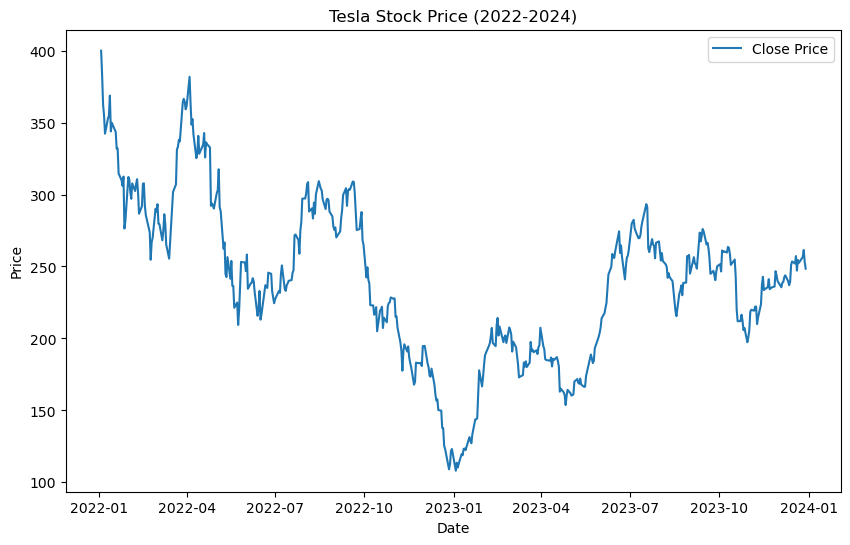

In [61]:
import yfinance as yf
import matplotlib.pyplot as plt
# Define the ticker symbol
ticker_symbol = "TSLA"
# Get the data
tesla_data = yf.download(ticker_symbol, start="2022-01-01", end="2024-01-01")
# Define a function to make a graph
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
# Plot the graph
make_graph(tesla_data, title='Tesla Stock Price (2022-2024)')

[*********************100%%**********************]  1 of 1 completed


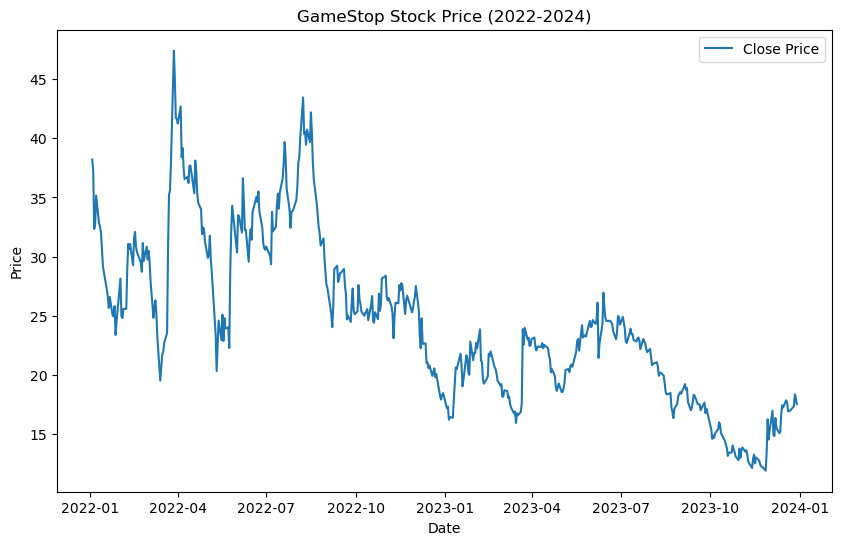

In [62]:
import yfinance as yf
import matplotlib.pyplot as plt
# Define the ticker symbol
ticker_symbol = "GME"
# Get the data
gme_data = yf.download(ticker_symbol, start="2022-01-01", end="2024-01-01")
# Define a function to make a graph
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
make_graph(gme_data, title='GameStop Stock Price (2022-2024)')